# Import Libararies

In [1]:
# Python Standard Libraries
import numpy as np
import pandas as pd

# Scikit-learn Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Scikit-learn Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Scikit-learn Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Scikit-learn Metrics
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix,
                             roc_curve, auc, precision_recall_curve, average_precision_score)

# Scikit-learn Feature Selection
from sklearn.feature_selection import SelectFromModel

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# Jupyter Magic Commands
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore') # Ignore warnings

# Load data

In [3]:
# Load the dataset into a pandas DataFrame
credit_df = pd.read_csv('/content/german-credit-card.csv')

# Show data information

In [4]:
# Display basic information about the DataFrame
print("Basic Information:")
print(credit_df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   saving_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 

In [5]:
# Display the first few rows of the DataFrame
print("\nFirst Few Rows:")
credit_df.head()


First Few Rows:


,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [6]:
# # Mapping the 'status' column to 'Good' and 'Bad'
# credit_df['status'] = credit_df['status'].replace({1: 'Good', 2: 'Bad'})

# # Display the first few rows to verify the changes
# credit_df.head()

## Data preprocessing

### Remove target from model training

In [7]:
# Get the features without the target variable
X_features = list(credit_df.columns)
X_features.remove('status')

## Create dummy variables for categorical values.

In [8]:
# insert the code to create dummy variable for categorical features. Hint: See MailingData_Preprocessing for example.
# Select only the features without the target
credit_df_X = credit_df[X_features]

# Get dummy variables for categorical columns
credit_df_complete = pd.get_dummies(credit_df_X, drop_first=True)

In [9]:
# Display the first few rows to verify the changes
credit_df_complete.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,1,0,1,0,1,0,1,0,0,0


In [10]:
# Print the number of columns after creating dummy variables
len(credit_df_complete.columns)

48

## Convert the credit rating (1 = Good, 2 = Bad) to value 0 or 1 for binary prediction labels

In [11]:
#Change the reponse variable to 0 = Good and 1 = Bad
Y = credit_df.status - 1
X = credit_df_complete

## Split the data for training and testing

In [12]:
# Splitting the data into a training set and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Printing the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (900, 48)
X_test shape: (100, 48)
Y_train shape: (900,)
Y_test shape: (100,)


## Standardize the data

In [13]:
# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming it
X_train_standardized = scaler.fit_transform(X_train)

# Using the same scaler to transform the test data
X_test_standardized = scaler.transform(X_test)

## Feature Selection

In [14]:
# Fit a RandomForestClassifier to the data to compute feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_standardized, Y_train)

# Output feature importances
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

# Select features based on importance
selector = SelectFromModel(clf, prefit=True, threshold=0.01) # You can modify the threshold
X_train_selected = selector.transform(X_train_standardized)
X_test_selected = selector.transform(X_test_standardized)

# Output the selected features
selected_features = X_train.columns[selector.get_support()]
print("\nSelected Features:")
print(selected_features)
print("\nNumber of Selected Features:")
len(selected_features)

Feature Importances:
                       importance
amount                   0.121735
age                      0.094451
duration                 0.082279
checkin_acc_A14          0.065759
inst_rate                0.040798
residing_since           0.038508
credit_history_A34       0.025556
inst_plans_A143          0.021696
num_credits              0.020947
housing_A152             0.020492
telephone_A192           0.019871
personal_status_A93      0.019463
saving_acc_A65           0.019010
checkin_acc_A12          0.018845
property_A123            0.018764
property_A122            0.017532
present_emp_since_A73    0.017403
personal_status_A92      0.017393
purpose_A43              0.017251
credit_history_A32       0.016615
job_A173                 0.015836
present_emp_since_A72    0.015611
purpose_A42              0.015265
dependents               0.014569
present_emp_since_A75    0.014355
present_emp_since_A74    0.014321
credit_history_A31       0.014092
job_A174                 0.

35

# Build Machine learning models (see Module 4 and 5 examples)

In [15]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label='ROC curve'):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'{label} (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Models to train
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42))
]

# Training and evaluating each model
for name, model in models:
    # Training the model
    model.fit(X_train_selected, Y_train)

    # Predicting on the test set
    Y_pred = model.predict(X_test_selected)

    # Calculating accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"\n{name} - Accuracy: {accuracy:.4f}")

    # Printing classification report
    print("Classification Report:")
    print(classification_report(Y_test, Y_pred))


Logistic Regression - Accuracy: 0.7800
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        71
           1       0.62      0.62      0.62        29

    accuracy                           0.78       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.78      0.78      0.78       100


Random Forest - Accuracy: 0.7200
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        71
           1       0.52      0.38      0.44        29

    accuracy                           0.72       100
   macro avg       0.65      0.62      0.63       100
weighted avg       0.70      0.72      0.71       100



## Hyperparameter Tuning of the best model using grid search CV

In [16]:
# Defining the hyperparameters and their values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(max_iter=5000, random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Use all processors
)

# Fit the model
grid_search.fit(X_train_selected, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
Y_pred_best = best_model.predict(X_test_selected)
accuracy_best = accuracy_score(Y_test, Y_pred_best)
print(f"Accuracy with Best Parameters: {accuracy_best:.4f}")

# Classification report
print("Classification Report with Best Parameters:")
print(classification_report(Y_test, Y_pred_best))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy with Best Parameters: 0.7800
Classification Report with Best Parameters:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        71
           1       0.62      0.62      0.62        29

    accuracy                           0.78       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.78      0.78      0.78       100



In conclusion, after tuning, the Logistic Regression model's best hyperparameters resulted in an accuracy of 78% with a macro average F1-score of 0.73

## Plots and performance results of best model

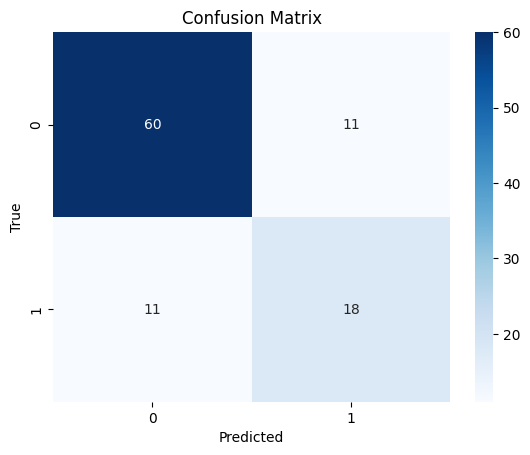

In [17]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

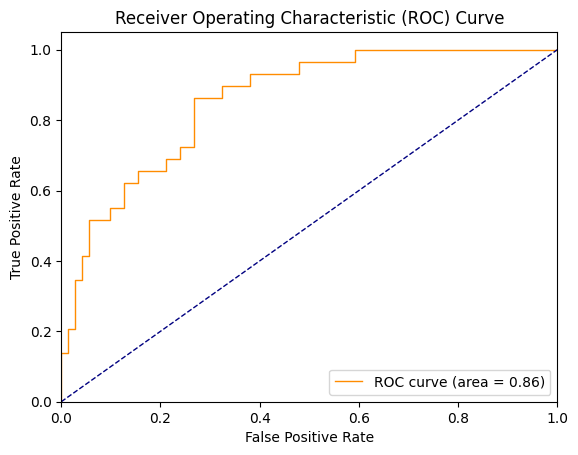

In [18]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, best_model.predict_proba(X_test_selected)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

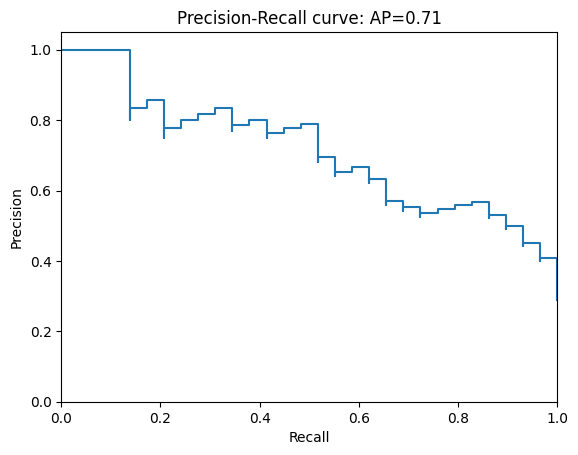

In [19]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test, best_model.predict_proba(X_test_selected)[:,1])
average_precision = average_precision_score(Y_test, best_model.predict_proba(X_test_selected)[:,1])

plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve: AP={average_precision:.2f}')
plt.show()